Prove the equation of the solution to the unknown parameters for more than one input variable (multiple linear regression) is given by: $$ \beta = (X^TX)^{-1}X^Ty $$
where, 
-  $` X = n * (d + 1)  `$ input matrix
-  $` \beta = (d + 1) * 1  `$ column vector of estimated regression coefficients
-  $` y = n * 1  `$ column vector of observed values

Multiple Linear Regression Model:

$` y = {b_0} + {b_1 x_1} + {b_2 x_2} + ... + {b_n{x_n}} + {\epsilon} `$

Let,  
$` X = [x_1, x_2, ..., x_n] `$  
$` \beta = [b_1, b_2, ..., b_n] `$  

=> $` y = {X \beta} `$

We have, Cost function $` J(\beta) `$:

$` = \sum _n ^i (y - \hat{y})^2 `$  
$` = (y - \hat{y})^T(y - \hat{y}) `$  
$` = (y - {X \beta})^T(y - {X \beta}) `$  
$` = (y^T - \beta ^T X^T)(y - {X \beta}) `$  
$` = y^T y - {X \beta}y^T - \beta ^T X^T y + \beta ^T X^T {X \beta} `$  
since  $` {X \beta}y^T = \beta ^T X^T y `$:  
$` = y^T y - 2 \beta ^T X^T y + \beta ^T  X^T {X \beta} `$  


Minimizing $` J(\beta) `$ by Taking Derivative:  
=> $` \frac{d}{d \beta} (y^T y - 2 \beta ^T X^T y + \beta ^T  X^T {X \beta}) = 0`$  
=> $` 0 - 2 X^T y + 2 X^T {X \beta} = 0`$  
=> $` 2 X^T {X \beta} = 2 X^T y `$  
=> $` X^T {X \beta} = X^T y `$  
=> $` \beta = (X^T X)^{-1} X^T y `$  

## Regression

In [157]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

from ucimlrepo import fetch_ucirepo 

In [158]:
student_performance = pd.read_csv('student/student-por.csv', sep=';')

X = student_performance.drop(['G1', 'G2', 'G3'], axis=1)
X1 = student_performance.drop('G3', axis=1)
y = student_performance['G3']

In [159]:
X.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,yes,no,no,4,3,4,1,1,3,4
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,yes,no,5,3,3,1,1,3,2
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,yes,no,4,3,2,2,3,3,6
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,yes,3,2,2,1,1,5,0
4,GP,F,16,U,GT3,T,3,3,other,other,...,yes,no,no,4,3,2,1,2,5,0


In [160]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [161]:
X.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000


In [162]:
for i in X:
    print(i, X[i].unique())

school ['GP' 'MS']
sex ['F' 'M']
age [18 17 15 16 19 22 20 21]
address ['U' 'R']
famsize ['GT3' 'LE3']
Pstatus ['A' 'T']
Medu [4 1 3 2 0]
Fedu [4 1 2 3 0]
Mjob ['at_home' 'health' 'other' 'services' 'teacher']
Fjob ['teacher' 'other' 'services' 'health' 'at_home']
reason ['course' 'other' 'home' 'reputation']
guardian ['mother' 'father' 'other']
traveltime [2 1 3 4]
studytime [2 3 1 4]
failures [0 3 1 2]
schoolsup ['yes' 'no']
famsup ['no' 'yes']
paid ['no' 'yes']
activities ['no' 'yes']
nursery ['yes' 'no']
higher ['yes' 'no']
internet ['no' 'yes']
romantic ['no' 'yes']
famrel [4 5 3 1 2]
freetime [3 2 4 1 5]
goout [4 3 2 1 5]
Dalc [1 2 5 3 4]
Walc [1 3 2 4 5]
health [3 5 1 2 4]
absences [ 4  2  6  0 10  8 16 14  1 12 24 22 32 30 21 15  9 18 26  7 11  5 13  3]


In [163]:
X = pd.get_dummies(X, drop_first=True, dtype=int)
X1 = pd.get_dummies(X1, drop_first=True, dtype=int)
X.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,1,0,1,0,0,0,1,1,0,0
1,17,1,1,1,2,0,5,3,3,1,...,0,0,0,1,0,0,0,1,1,0
2,15,1,1,1,2,0,4,3,2,2,...,1,0,1,0,0,0,1,1,1,0
3,15,4,2,1,3,0,3,2,2,1,...,1,0,0,1,0,1,1,1,1,1
4,16,3,3,1,2,0,4,3,2,1,...,0,0,0,1,0,0,1,1,0,0


In [164]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X1 = pd.DataFrame(scaler.fit_transform(X1), columns=X1.columns)

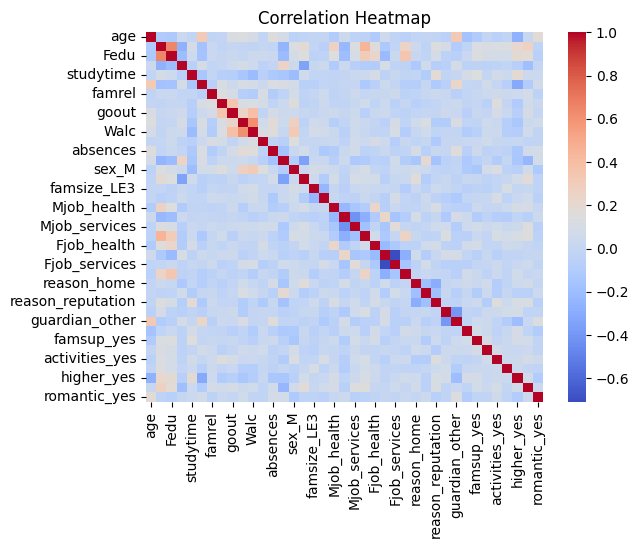

In [165]:
# plt.figure(figsize=(12, 8))
sns.heatmap(X.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [166]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X1_train, X1_test, _, _ = train_test_split(X1, y, test_size=0.2, random_state=42)

In [167]:
def ols_method(X, y):
    X = np.c_[np.ones(X.shape[0]), X]
    beta = np.linalg.inv(X.T @ X) @ X.T @ y
    return beta

In [168]:
def gradient_descent(X, y):
    alpha = 0.001
    epochs = 1000
    m, n = X.shape
    X = np.c_[np.ones(m), X]

    beta = np.zeros(n + 1)
    for _ in range(epochs):
        y_pred = X @ beta
        gradient = (1/m) * X.T @ (y_pred - y)
        beta -= alpha * gradient
    return beta

In [169]:
def predict_and_evaluate(X, y, beta, title):
    X = np.c_[np.ones(X.shape[0]), X]
    y_pred = X @ beta
    print(f'{title} R² Score:', r2_score(y, y_pred))
    print(f'{title} Mean Squared Error:', mean_squared_error(y, y_pred))

In [170]:
beta_ols_1 = ols_method(X_train, y_train)
beta_ols_2 = ols_method(X1_train, y_train)

predict_and_evaluate(X_test, y_test, beta_ols_1, 'OLS (Without G1 & G2)')
predict_and_evaluate(X1_test, y_test, beta_ols_2, 'OLS (With G1 & G2)')

OLS (Without G1 & G2) R² Score: 0.1601699196431826
OLS (Without G1 & G2) Mean Squared Error: 8.189784412019227
OLS (With G1 & G2) R² Score: 0.8486513286537314
OLS (With G1 & G2) Mean Squared Error: 1.4759092563639313


In [171]:
beta_gd_1 = gradient_descent(X_train, y_train)
beta_gd_2 = gradient_descent(X1_train, y_train)

predict_and_evaluate(X_test, y_test, beta_gd_1, 'Gradient Descent (Without G1 & G2)')
predict_and_evaluate(X1_test, y_test, beta_gd_2, 'Gradient Descent (With G1 & G2)')

Gradient Descent (Without G1 & G2) R² Score: -2.4551210238370476
Gradient Descent (Without G1 & G2) Mean Squared Error: 33.6933588883101
Gradient Descent (With G1 & G2) R² Score: -1.5842646607362831
Gradient Descent (With G1 & G2) Mean Squared Error: 25.201014979170555
